In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
mag = np.load("../output/PerpSTT-2025-05-16-222816/mag.npy") # Simulating this took 1692.62 s

In [17]:
switching_indicies = []
for i, m in enumerate(mag):
    if np.sign(m[0, 2]) != np.sign(m[-1, 2]):
        switching_indicies.append(i)

print(f"Amount of runs resulted in switching: {len(switching_indicies)}/{len(mag)}")

Amount of runs resulted in switching: 698/1000


In [18]:
v = np.load("../output/PerpSTT-2025-05-16-222816/voltages.npy")

Text(0.5, 0, 'Voltage (V)')

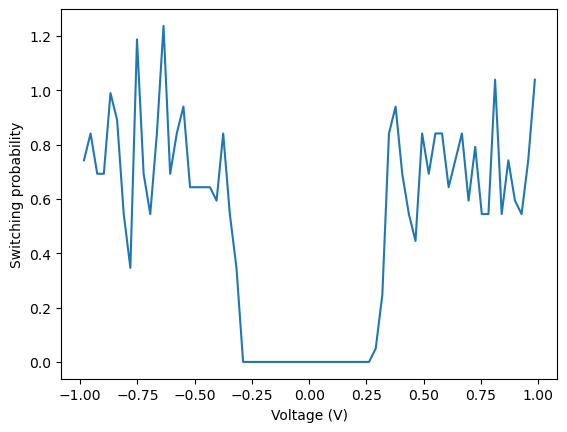

In [19]:
switching_voltages = np.take(v, switching_indicies)

p, x = np.histogram(switching_voltages, bins=int(len(switching_indicies)/10), density=True) # bin it into n = N//10 bins
x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers

plt.plot(x, p)
plt.ylabel("Switching probability")
plt.xlabel("Voltage (V)")

In [20]:
time_series = np.load("../output/PerpSTT-2025-05-16-222816/time_series.npy")

Text(0, 0.5, 'Switching duration (s)')

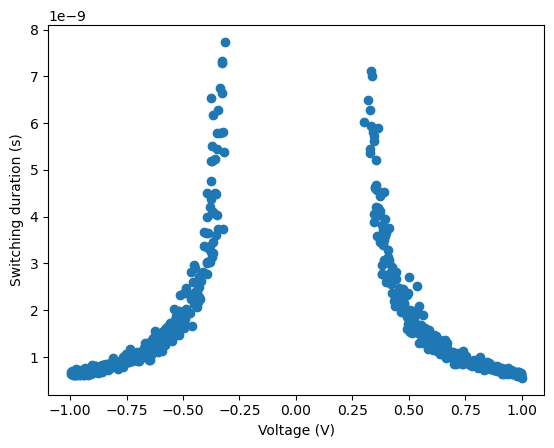

In [65]:
switching_time = []
for i in switching_indicies:
    mz_abs = np.abs(mag[i, :, 2])
    mz_min_idx = np.argmin(mz_abs)
    switching_time.append((v[i], time_series[mz_min_idx]))

x, y = zip(*switching_time)
plt.scatter(x, y)
plt.xlabel("Voltage (V)")
plt.ylabel("Switching duration (s)")

In [62]:
v_fw = np.load("../output/PerpSTT-2025-05-19-221718/voltages.npy")
v_bw = np.load("../output/PerpSTT-2025-05-19-222102/voltages.npy")
mag1_fw = np.load("../output/PerpSTT-2025-05-19-225153/mag.npy") 
mag1_bw = np.load("../output/PerpSTT-2025-05-19-225549/mag.npy") 
mag2_fw = np.load("../output/PerpSTT-2025-05-19-222446/mag.npy") 
mag2_bw = np.load("../output/PerpSTT-2025-05-19-222824/mag.npy") 
mag3_fw = np.load("../output/PerpSTT-2025-05-19-223212/mag.npy") 
mag3_bw = np.load("../output/PerpSTT-2025-05-19-223605/mag.npy") 

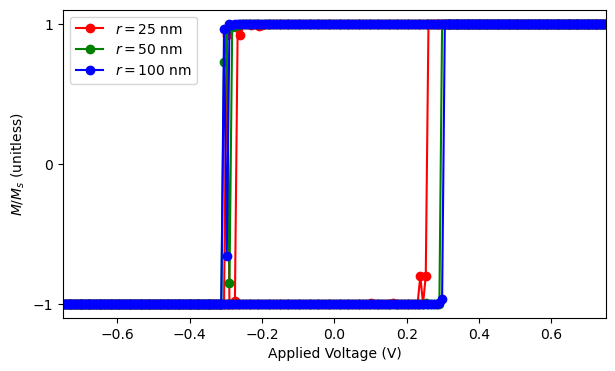

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))

m_fw = [mag1_fw, mag2_fw, mag3_fw]
m_bw = [mag1_bw, mag2_bw, mag3_bw]

styles = ["r-o", "g-o", "b-o"]
labels=[
    "$r=25$ nm",
    "$r=50$ nm",
    "$r=100$ nm",
]

for mag_fw, mag_bw, s, l in zip(m_fw, m_bw, styles, labels):
    mz_filtered_fw = []
    mz_filtered_bw = []
    for mz_fw, mz_bw in zip(mag_fw[:, :, 2], mag_bw[:, :, 2]):
        ind = np.argwhere(mz_fw)
        mz_filtered_fw.append(mz_fw[ind][-1])
        ind = np.argwhere(mz_bw)
        mz_filtered_bw.append(mz_bw[ind][-1])


    ax.plot(v_fw, mz_filtered_fw, s, label=l)
    ax.plot(v_bw, mz_filtered_bw, s)

ax.legend()
ax.set_xlim(-0.75, 0.75)
ax.set_ylabel("$M/M_s$ (unitless)")
ax.set_xlabel("Applied Voltage (V)")
ax.set_yticks([-1,0,1])